## Environment Setting

In [3]:
import pandas as pd #data handlig
import numpy as np
from gsdmm.mgp import MovieGroupProcess

#preprocessing data
import nltk
from nltk.tokenize import RegexpTokenizer
import replacers #making-program "replacers.py"
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.manifold import TSNE
from stopwords import stopwords

from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline

## Load Data Set

In [4]:
df = pd.read_csv('./data/Walmart_review.csv', encoding='949')
df = df.drop(df.columns[0], axis=1)
print(df.shape)
df.head()

(719, 1)


,col
0,Amazing product. The accuracy recognizing what...
1,I've had my Google Home for about 3 weeks and ...
2,The Google Home is a well built voice activate...
3,I ordered this because I had seen it advertise...
4,It's pretty much like having the power of the ...


## Pre-processing

We want to use review text only for text clustering.

In [5]:
reviewList = df['col']
print(type(reviewList))
reviewList[0]

<class 'pandas.core.series.Series'>


'Amazing product. The accuracy recognizing what I say is extremely good. Been using it mostly for news and music in the morning, and to impress friends when they come. Want to set up some iot lights that I can use voice control on but they\'re too expensive at the moment. If you have a chrome cast you\'ll never have to search for videos again because you can just find them with your voice and it integrates flawlessly. The speaker is surprisingly very robust. \r\r\n\r\r\nOnly negative for me is having to say "hey Google" every time. It\'s not as smooth as saying a name like Alexa.'

Making a nested list of review to match the clustering input data type.

In [6]:
newList = [text for text in reviewList]
print(type(newList))
#newList

<class 'list'>


Change review text to all lowercase.

In [7]:
lower_text = [str(line).lower() for line in newList]
#lower_text

Explode all abbreviations. Remove the apostrophe to restore the original sentence.

In [8]:
replacer = replacers.RegexpReplacer()
decomp_words_text = [replacer.replace(line) for line in lower_text]
#decomp_words_text

Create a token by disassembling each review sentence.

In [9]:
def tokenize(list_type):
    
    t = RegexpTokenizer("[\w]+")
    tokenized_list = []

    for word in list_type:
        tokens = t.tokenize(word)
        tokenized_list.append(tokens)
    
    return tokenized_list

In [11]:
token = tokenize(decomp_words_text)
print(len(token))
#token

719


The above preprocessing process is the same as the existing method(our project).

-------------------------------------

## Text Clustering with GSDMM

"A Dirichlet Multinomial Mixture Model-based Approach for Short Text Clustering" written by Jianhua Yin and Jianyong Wang 

A function that checks for unique words.

In [12]:
def compute_Voca(texts):
    V = set()
    for text in texts:
        for word in text:
            V.add(word)
    return V

Execution result

In [13]:
size = len(compute_Voca(token))
size

2807

Set the parameters(K, alpha, beta)

In [14]:
mgp = MovieGroupProcess(K=15, n_iters=100, alpha=0.1, beta=0.1)

### Model fitting

In [15]:
y = mgp.fit(token, size)

In stage 0: transferred 638 clusters with 15 clusters populated
In stage 1: transferred 376 clusters with 12 clusters populated
In stage 2: transferred 228 clusters with 9 clusters populated
In stage 3: transferred 130 clusters with 6 clusters populated
In stage 4: transferred 97 clusters with 4 clusters populated
In stage 5: transferred 83 clusters with 5 clusters populated
In stage 6: transferred 77 clusters with 3 clusters populated
In stage 7: transferred 61 clusters with 4 clusters populated
In stage 8: transferred 67 clusters with 2 clusters populated
In stage 9: transferred 64 clusters with 3 clusters populated
In stage 10: transferred 62 clusters with 2 clusters populated
In stage 11: transferred 65 clusters with 2 clusters populated
In stage 12: transferred 55 clusters with 3 clusters populated
In stage 13: transferred 55 clusters with 2 clusters populated
In stage 14: transferred 57 clusters with 3 clusters populated
In stage 15: transferred 47 clusters with 3 clusters popula

In [16]:
len(y)

719

In [17]:
set(y)

{0, 5, 14}

In [18]:
cluster = {
    'cluster': y,
    'review': decomp_words_text
}

export = pd.DataFrame.from_dict(cluster)

In [19]:
export.to_csv('cluster_review_walmart.csv')

------------------------------------------------

Removing Stopwords same as pLSA

In [20]:
stops = nltk.corpus.stopwords.words('english')
newstops = stops + stopwords

In [22]:
def tokenize_stream(list_type):
    
    t = RegexpTokenizer("[\w]+")
    tokenized_list = []

    for word in list_type:
        tokens = t.tokenize(word)
        tokenized_list += tokens
    
    return tokenized_list

In [23]:
# Cluster14
Textcluster14 = list(export[export['cluster']==14]['review'])
lowerText1 = [line.lower() for line in Textcluster14]
decompText1 = [replacer.replace(line) for line in lowerText1]
token_1 = tokenize_stream(decompText1)
token_1 = [line for line in token_1 if line not in newstops]
clusterList1 = list(Counter(token_1).items())
clusterList1 = sorted(clusterList1, key=itemgetter(1), reverse=True)

In [29]:
# Cluster0
Textcluster0 = list(export[export['cluster']==0]['review'])
lowerText2 = [line.lower() for line in Textcluster0]
decompText2 = [replacer.replace(line) for line in lowerText2]
token_2 = tokenize_stream(decompText2)
token_2 = [line for line in token_2 if line not in newstops]
clusterList2 = list(Counter(token_2).items())
clusterList2 = sorted(clusterList2, key=itemgetter(1), reverse=True)

In [31]:
s = pd.DataFrame(clusterList1, columns=['Features', 'Counts'])[4:24]
s1 = pd.DataFrame(clusterList2, columns=['Features', 'Counts'])[:20]

In [32]:
features1 = list(s['Features'].values.tolist())
values1 = list(s['Counts'].values.tolist())

features2 = list(s1['Features'].values.tolist())
values2 = list(s1['Counts'].values.tolist())

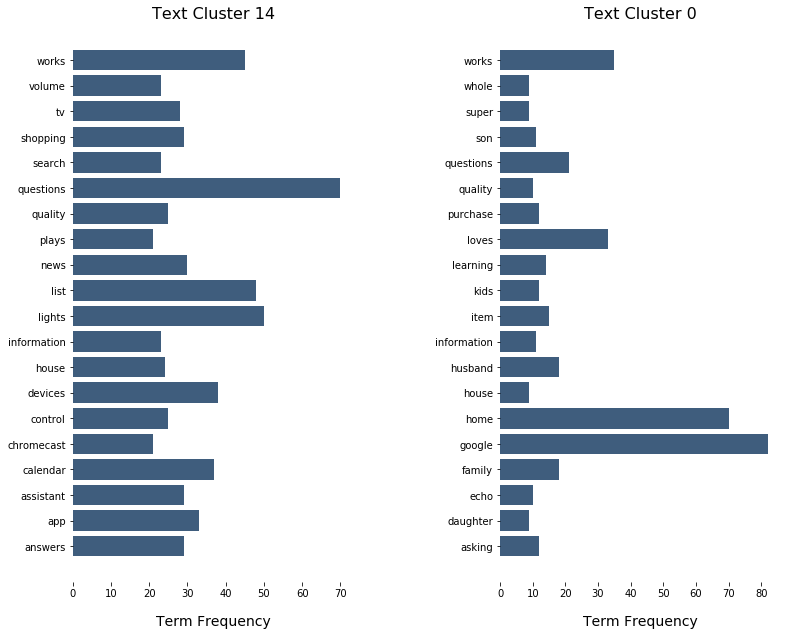

In [34]:
# Visualization with Bar chart
fig = plt.figure(figsize=(12, 9), facecolor="w")
ax = fig.add_subplot(1, 2, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel("Term Frequency", labelpad=16, fontsize=14)
ax.set_title("Text Cluster 14", fontsize=16)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.barh(features1, values1, align='center', color='#3F5D7D')
ax.set_yticks(features1)
#ax.set_ylim([-1, x[-1]+1])
plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
yticks = ax.set_yticklabels(features1)

ax = fig.add_subplot(1, 2, 2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel("Term Frequency", labelpad=16, fontsize=14)
ax.set_title("Text Cluster 0", fontsize=16)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.barh(features2, values2, align='center', color='#3F5D7D')
ax.set_yticks(features2)
#ax.set_ylim([-1, x[-1]+1])
plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
yticks = ax.set_yticklabels(features2)

plt.show()

In [35]:
# Cluster4
Textcluster5 = list(export[export['cluster']==5]['review'])
lowerText3 = [line.lower() for line in Textcluster5]
decompText3 = [replacer.replace(line) for line in lowerText3]
token_3 = tokenize_stream(decompText3)
token_3 = [line for line in token_3 if line not in newstops]
clusterList3 = list(Counter(token_3).items())
clusterList3 = sorted(clusterList3, key=itemgetter(1), reverse=True)

In [374]:
"""
# Cluster6
Textcluster6 = list(export[export['cluster']==6]['review'])
lowerText4 = [line.lower() for line in Textcluster6]
decompText4 = [replacer.replace(line) for line in lowerText4]
token_4 = tokenize_stream(decompText4)
token_4 = [line for line in token_4 if line not in newstops]
clusterList4 = list(Counter(token_4).items())
clusterList4 = sorted(clusterList4, key=itemgetter(1), reverse=True)
"""

In [36]:
s3 = pd.DataFrame(clusterList3, columns=['Features', 'Counts'])
#s4 = pd.DataFrame(clusterList4, columns=['Features', 'Counts'])[:20]

In [37]:
features3 = list(s3['Features'].values.tolist())
values3 = list(s3['Counts'].values.tolist())

#features4 = list(s4['Features'].values.tolist())
#values4 = list(s4['Counts'].values.tolist())

NameError: name 'features4' is not defined

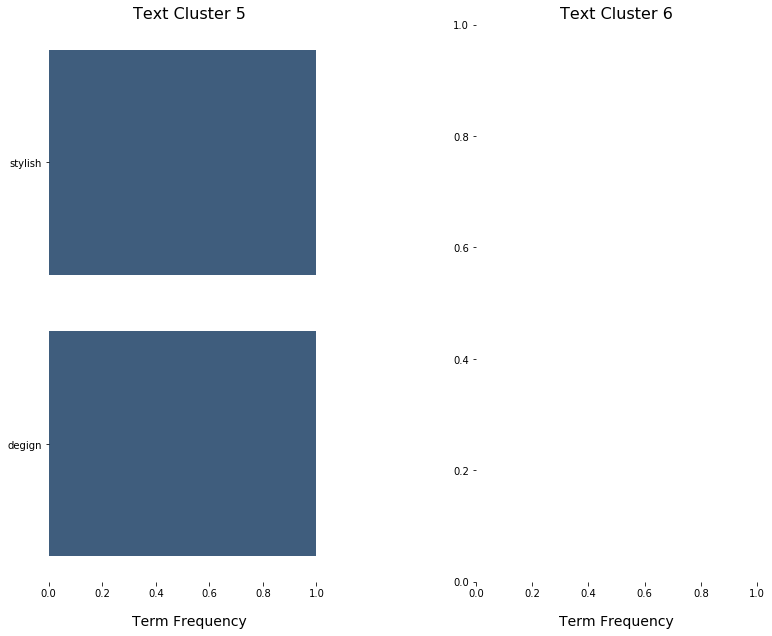

In [38]:
# Visualization with Bar chart
fig = plt.figure(figsize=(12, 9), facecolor="w")
ax = fig.add_subplot(1, 2, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel("Term Frequency", labelpad=16, fontsize=14)
ax.set_title("Text Cluster 5", fontsize=16)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.barh(features3, values3, align='center', color='#3F5D7D')
ax.set_yticks(features3)
#ax.set_ylim([-1, x[-1]+1])
plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
yticks = ax.set_yticklabels(features3)

ax = fig.add_subplot(1, 2, 2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel("Term Frequency", labelpad=16, fontsize=14)
ax.set_title("Text Cluster 6", fontsize=16)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.barh(features4, values4, align='center', color='#3F5D7D')
ax.set_yticks(features4)
#ax.set_ylim([-1, x[-1]+1])
plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
yticks = ax.set_yticklabels(features4)

plt.show()

-----------------------------------

Reference

- Visualizaiton using t-SNE

In [39]:
# related to t-SNE
A_tfidf_sp = tfidf.fit_transform(Textcluster14, max_features=50)  # need to attr. max_features=50 
tfidf_dict = tfidf.get_feature_names()
#print(tfidf_dict)

NameError: name 'tfidf' is not defined

In [51]:
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(358, 50)

In [52]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
data_array.shape

(358, 50)

In [53]:
data_array.T.shape

(50, 358)

In [54]:
Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 1.252526
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.203621
[t-SNE] Error after 1800 iterations: 0.504290


In [55]:
print(Z[0:5])
print('Top words: ',len(Z))

[[  60.04283524   -5.24120045]
 [-122.28665161   21.90007973]
 [ -39.95552063  -65.68734741]
 [  75.25675201 -109.78327179]
 [ 108.33803558   29.7869854 ]]
Top words:  50


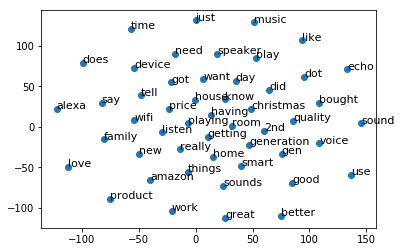

In [56]:
#path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(size=11)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.figure(figsize=(14,4))
plt.draw()

-----------------------